In [1]:
#Program to generate the Bell state phi-
from qiskit import *

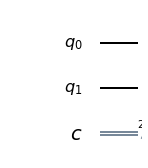

In [2]:
qc=QuantumCircuit(2,2)  #Creating a quantum circuit with 2 qubits and 2 bits
qc.draw(output='mpl')

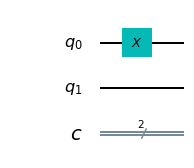

In [3]:
#Process is similar to the generation of phi+ with the additional step of adding a X gate on the first qubit as shown
qc.x(0) #This takes the first qubit from ket(0) to ket(1), state of two qubits is ket(10)
qc.draw(output='mpl')
#After this the process is exactly the same as that of generating phi+

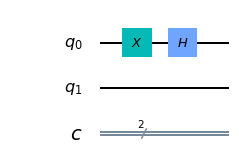

In [4]:
#Applying a hadamard gate to the first qubit
qc.h(0)  #This takes the first qubit from ket(1) to ket(-)
qc.draw(output='mpl')

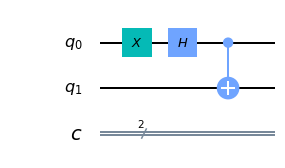

In [5]:
#Applying a cnot with qubit 0 as the control qubit and qubit 1 as the target qubit
qc.cx(0,1) #This gives phi+
qc.draw(output='mpl')

In [6]:
#Simulating the statevector of the two qubits
backend_req=Aer.get_backend('statevector_simulator') #setting up the required backend

In [7]:
#executing the circuit
job_req=execute(qc,backend_req)

In [8]:
#Extracting the results
req_statevector=job_req.result().get_statevector()
for amplitude in req_statevector:
    print(amplitude)

(0.7071067811865476-8.659560562354934e-17j)
0j
0j
(-0.7071067811865476+8.659560562354934e-17j)


In [10]:
print(req_statevector)

[ 0.70710678-8.65956056e-17j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j -0.70710678+8.65956056e-17j]


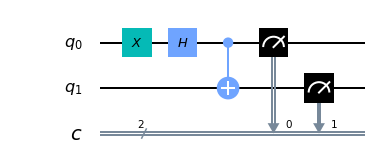

In [11]:
#Performing a measurement on both the qubits
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')

In [13]:
#Executing the circuit on a simulated quantum device
backend_sim_qd=Aer.get_backend('qasm_simulator')
job_sim_qd=execute(qc,backend_sim_qd,shots=8000)


In [15]:
#Extracting the results
hist=job_sim_qd.result().get_counts()
print(hist)

{'11': 3988, '00': 4012}


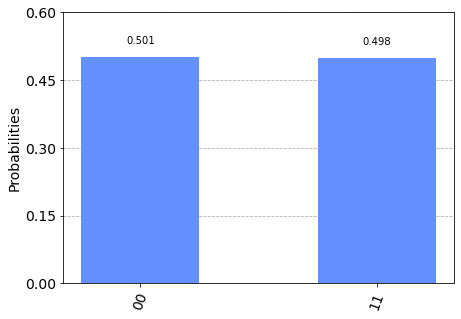

In [16]:
#Plotting the results
from qiskit.visualization import plot_histogram
plot_histogram(hist)